# Clustering and the $k$-means algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<font color = 'green'> __Supervised learning:__ <font color = black> Learning from labeled data -- data with known values of the target variable. Parameters are tuned by comparing predictions to known values of the target variable and trying to make predictions more accurate.

<font color = 'green'> __Unsupervised learning:__ <font color = black> Learning without labeled data -- target variable is unknown. Goal is to identify patterns in the data.

<font color = 'green'> __Clustering:__ <font color = black> The unsupervised analogue of classification. Attempting to classify our data points into "clusters" of instances that appear to be similar to one another.

### Example: pets data

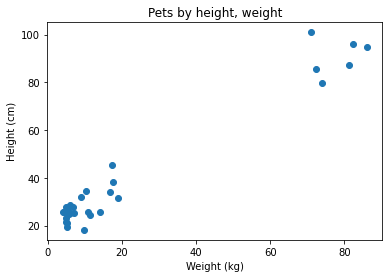

In [2]:
pets = pd.read_csv('pets.csv', index_col=0)
pets
plt.plot(pets.loc[:,'weight'], pets.loc[:,'height'], 'o')
plt.title('Pets by height, weight')
plt.ylabel('Height (cm)')
plt.xlabel('Weight (kg)')
plt.show()

If we don't know in advance that these are dogs, ponies, etc., we can still clearly see that the points naturally fall into two groups.

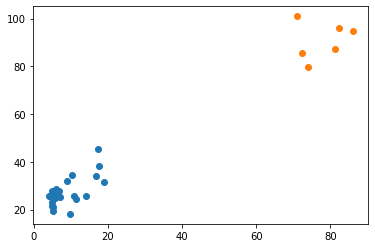

In [3]:
pets_unlabeled = pets.drop('label', axis = 1)
cls = KMeans(n_clusters=2)
cls.fit(X=pets_unlabeled.values)
labels = cls.predict(pets_unlabeled.values)

cluster_0 = pets_unlabeled.loc[labels == 0].values
cluster_1 = pets_unlabeled.loc[labels == 1].values
plt.plot(cluster_0[:,1], cluster_0[:,0], 'o')
plt.plot(cluster_1[:,1], cluster_1[:,0], 'o')

<font color = green> **Centroid**: <font color = black> The average of a collection of data points along all coordinate axes. The same as the "center of mass" of a collection of points if all points are assigned equal weight.

<font color = green> **$k$-means clustering**: <font color = black> An approach to clustering that attempts to find $k$ different centroids, assigning each point to a cluster based on which centroid is closest.

Notice we had to specify the number of groups we were looking for. $k$, the number of clusters, is a hyperparameter -- we have to select it before training the model. (This is similar to the situation in $k$-nearest neighbors, but be careful -- these are not the same $k$!)

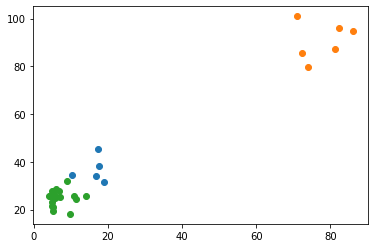

In [4]:
pets_unlabeled = pets.drop('label', axis = 1)
cls = KMeans(n_clusters=3)
cls.fit(X=pets_unlabeled.values)
labels = cls.predict(pets_unlabeled.values)

cluster_0 = pets_unlabeled.loc[labels == 0].values
cluster_1 = pets_unlabeled.loc[labels == 1].values
cluster_2 = pets_unlabeled.loc[labels == 2].values
plt.plot(cluster_0[:,1], cluster_0[:,0], 'o')
plt.plot(cluster_1[:,1], cluster_1[:,0], 'o')
plt.plot(cluster_2[:,1], cluster_2[:,0], 'o')

In [5]:
cls.cluster_centers_

array([[36.7       , 16.2       ],
       [90.76666667, 77.85      ],
       [25.05263158,  6.88421053]])

This successfully isolates the ponies, but can't perfectly separate the cats and dogs. But this is not unexpected -- we saw that can be hard even with labeled data.

What if we increase the number of clusters even more?

(17.0, 50.0)

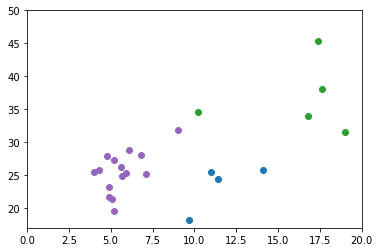

In [10]:
# Run this cell a few times, see if anything changes
pets_unlabeled = pets.drop('label', axis = 1)
cls = KMeans(n_clusters=6)
cls.fit(X=pets_unlabeled.values)
labels = cls.predict(pets_unlabeled.values)

cluster_0 = pets_unlabeled.loc[labels == 0].values
cluster_1 = pets_unlabeled.loc[labels == 1].values
cluster_2 = pets_unlabeled.loc[labels == 2].values
cluster_3 = pets_unlabeled.loc[labels == 3].values
cluster_4 = pets_unlabeled.loc[labels == 4].values
cluster_5 = pets_unlabeled.loc[labels == 5].values
plt.plot(cluster_0[:,1], cluster_0[:,0], 'o')
plt.plot(cluster_1[:,1], cluster_1[:,0], 'o')
plt.plot(cluster_2[:,1], cluster_2[:,0], 'o')
plt.plot(cluster_3[:,1], cluster_3[:,0], 'o')
plt.plot(cluster_4[:,1], cluster_4[:,0], 'o')
plt.plot(cluster_5[:,1], cluster_5[:,0], 'o')
plt.xlim(0, 20)
plt.ylim(17, 50)

In some cases, the algorithm will not find the same clusters every time. We'll see why this is next time, when we go into detail about how the algorithm works.

Before that, though, let's explore some other behavior of the algorithm -- particularly, how it can fail.

### $k$-means behaving badly

<font color = 'green'> __Preprocessing:__ <font color = black> Applying a transformation to the data before fitting the model.

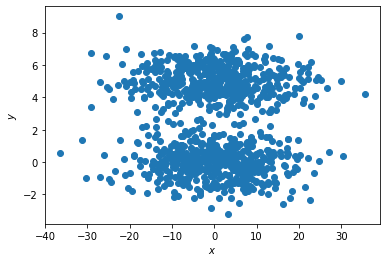

In [11]:
# Generate some fake data
#plt.figure(figsize=(15, 15))
x = 10*np.random.randn(1000)
y = np.concatenate((np.random.randn(500), np.random.randn(500) + 5))
df = pd.DataFrame(np.column_stack((x,y)), columns = ['x', 'y'])
plt.plot(df['x'], df['y'], 'o')
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.xlim(-40, 40)
#plt.ylim(-40, 40)
plt.show()

Looking at the data we can see two obvious clusters of points. So we let our $k$-means algorithm try to find them.

In [12]:
cls = KMeans(n_clusters = 2)
cls.fit(X=df.values)
labels = cls.predict(df.values)

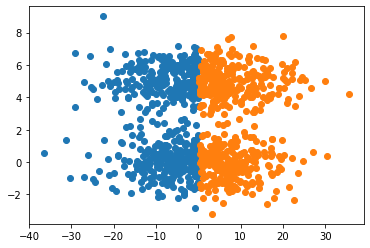

In [13]:
# Let's see what clusters the algorithm found.
cluster_0 = df.loc[np.where(labels == 0)].values
cluster_1 = df.loc[np.where(labels == 1)].values
plt.plot(cluster_0[:,0], cluster_0[:,1], 'o')
plt.plot(cluster_1[:,0], cluster_1[:,1], 'o')

That's not good! Instead of detecting the two clusters that seem obvious to our eyes, it has split them both in half. Why?

$k$-means, even though it's not quite a nearest-neighbor algorithm, is still based on distances: it classifies observations by their distance from an average point. The problem here is that the $y$ variable is the most informative variable; but, the $x$-coordinates vary on a much wider scale. So distances are dominated by distances in the $x$-direction.

In [14]:
# Try scaling the data
scaler = StandardScaler()
scaler.fit(df.values)
X_scaled = scaler.transform(df.values) # calculate the z-scores

cls = KMeans(n_clusters = 2)
cls.fit(X=X_scaled)
labels = cls.predict(X_scaled)

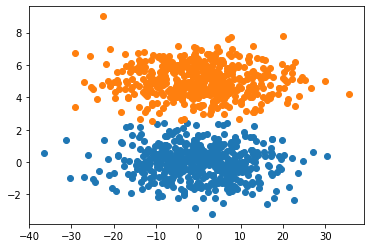

In [15]:
# Let's see what clusters the algorithm found.
cluster_0 = df.loc[np.where(labels == 0)].values
cluster_1 = df.loc[np.where(labels == 1)].values
plt.plot(cluster_0[:,0], cluster_0[:,1], 'o')
plt.plot(cluster_1[:,0], cluster_1[:,1], 'o')

Much better!

Although this example was with artificial data, the problem is real. Most real data is measured in some kind of units, and changing the units (e.g. going from meters to cm) can drastically change the scales of different variables. This can negatively impact the performance of $k$-means.

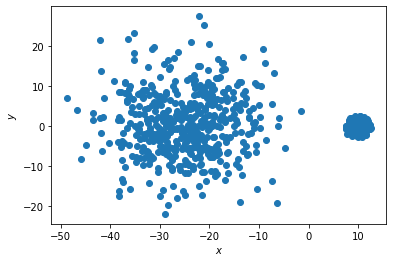

In [16]:
# Generate some fake data
x = np.concatenate((np.random.randn(500) + 10, 8*np.random.randn(500) - 25))
y = np.concatenate((np.random.randn(500), 8*np.random.randn(500)))
df = pd.DataFrame(np.column_stack((x,y)), columns = ['x', 'y'])
plt.plot(df['x'], df['y'], 'o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

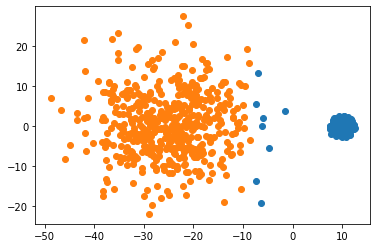

In [17]:
cls = KMeans(n_clusters = 2)
cls.fit(X=df.values)
labels = cls.predict(df.values)
cluster_0 = df.loc[np.where(labels == 0)].values
cluster_1 = df.loc[np.where(labels == 1)].values
plt.plot(cluster_0[:,0], cluster_0[:,1], 'o')
plt.plot(cluster_1[:,0], cluster_1[:,1], 'o')

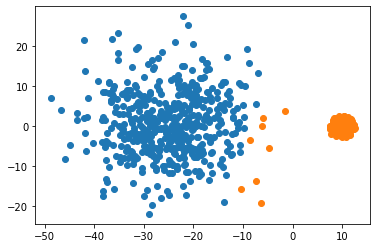

In [18]:
scaler = StandardScaler()
scaler.fit(df.values)
X_scaled = scaler.transform(df.values) # calculate the z-scores

cls = KMeans(n_clusters = 2)
cls.fit(X=X_scaled)
labels = cls.predict(X_scaled)
cluster_0 = df.loc[np.where(labels == 0)].values
cluster_1 = df.loc[np.where(labels == 1)].values
plt.plot(cluster_0[:,0], cluster_0[:,1], 'o')
plt.plot(cluster_1[:,0], cluster_1[:,1], 'o')

### Example: unknown wine

The following data is from a chemical analysis of wines grown in Italy. The wines all come from the same region, but from three different cultivars (types of grape).

Can we cluster the wines correctly so that we know which wines came from the same cultivar?

In [19]:
wine = pd.read_csv('wine_noclass.csv')        # the wine data without labels
labels = pd.read_csv('wine.data')['Class']    # the correct labels, for later comparison
wine.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alkalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocynanins', 'Color intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

That's a lot of variables; let's pick a few to plot against one another.

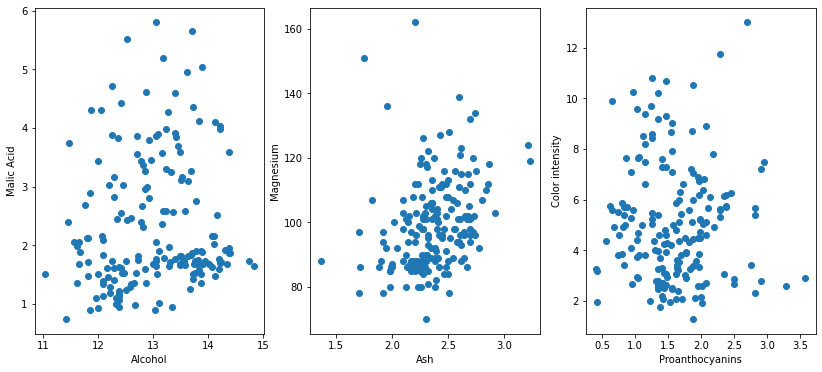

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 6))
ax1.plot(wine['Alcohol'], wine['Malic Acid'], 'o')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')
ax2.plot(wine['Ash'], wine['Magnesium'], 'o')
ax2.set_xlabel('Ash')
ax2.set_ylabel('Magnesium')
ax3.plot(wine['Proanthocynanins'], wine['Color intensity'], 'o')
ax3.set_xlabel('Proanthocyanins')
ax3.set_ylabel('Color intensity')
plt.show()

The three clusters are now not so easily distinguishable by eye. So, we can benefit by using some ML to try to extract them. Let's try running $k$-means on this data set. We know in advance that there should be three groups, so we can choose $k = 3$.

In [28]:
cls = KMeans(n_clusters=3) 
cls.fit(X = wine.values) 
clusters = cls.predict(wine.values)

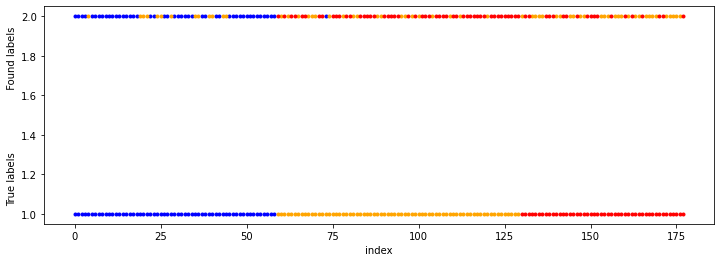

In [29]:
# Use a plot to compare the true labels to the found labels
ax = plt.figure(figsize = (12, 4))
true_clusters = [wine.index[labels == i] for i in range(1,4)]     # in the data set labels are 1, 2, 3
found_clusters = [wine.index[clusters == i] for i in range(3)]    # but kmeans will label them 0, 1, 2
found_clusters.sort(key = lambda l: min(l))                     # kmeans doesn't order clusters
colors = ['blue', 'orange', 'red']
for i in range(3):
    plt.plot(true_clusters[i], np.ones_like(true_clusters[i]), '.', color = colors[i])
    plt.plot(found_clusters[i], 2 * np.ones_like(found_clusters[i]), '.', color = colors[i])
plt.xlabel('index')
plt.ylabel('True labels' + 20 * ' ' + 'Found labels')
plt.show()

So our $k$-means did an ok job of isolating one of the clusters, but totally mixed the other two.

Is there anything we *didn't* do that might improve these results?

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine.values)
cls = KMeans(n_clusters = 3)
cls.fit(X = X_scaled)
clusters = cls.predict(X_scaled)

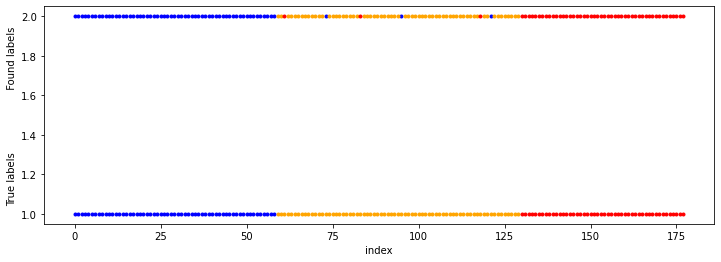

In [33]:
# Use a plot to compare the true labels to the found labels
ax = plt.figure(figsize = (12, 4))
true_clusters = [wine.index[labels == i] for i in range(1,4)]     # in the data set labels are 1, 2, 3
found_clusters = [wine.index[clusters == i] for i in range(3)]    # but kmeans will label them 0, 1, 2
found_clusters.sort(key = lambda l: min(l))                     # kmeans doesn't order clusters
colors = ['blue', 'orange', 'red']
for i in range(3):
    plt.plot(true_clusters[i], np.ones_like(true_clusters[i]), '.', color = colors[i])
for i in range(3):
    plt.plot(found_clusters[i], 2 * np.ones_like(found_clusters[i]), '.', color = colors[i])
plt.xlabel('index')
plt.ylabel('True labels' + 20 * ' ' + 'Found labels')
plt.show()

Again, much better.

Don't forget to scale your inputs!

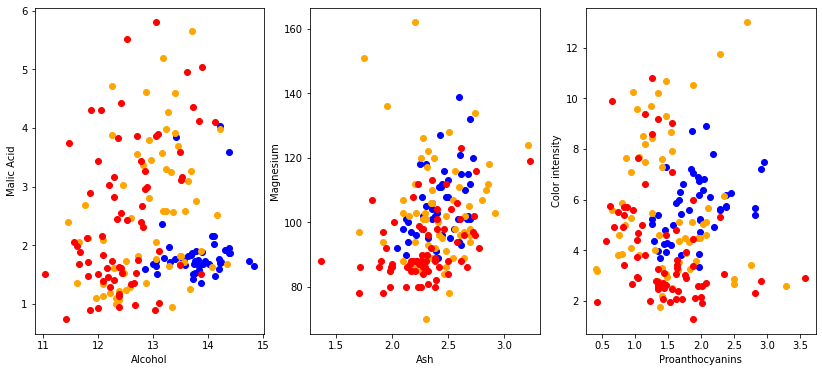

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 6))
for i in range(3):
    ax1.plot(wine.loc[found_clusters[i], 'Alcohol'], 
             wine.loc[found_clusters[i],'Malic Acid'],
             'o', color = colors[i])
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')
for i in range(3):
    ax2.plot(wine.loc[found_clusters[i],'Ash'], 
             wine.loc[found_clusters[i],'Magnesium'],
             'o', color = colors[i])
ax2.set_xlabel('Ash')
ax2.set_ylabel('Magnesium')
for i in range(3):
    ax3.plot(wine.loc[found_clusters[i],'Proanthocynanins'], 
             wine.loc[found_clusters[i], 'Color intensity'],
             'o', color = colors[i])
ax3.set_xlabel('Proanthocyanins')
ax3.set_ylabel('Color intensity')
plt.show()

### $k$-means by hand

Here we use the nearest-neighbor code from the $k$-nearest neighbor to hack together a simple version of the $k$-means algorithm. We need `get_distance_series` and one new function, `classify_point`.

In [34]:
def euclidean_distance(v1, v2):
    diff = v1 - v2
    total = np.sum(diff ** 2)
    return np.sqrt(total)
def get_distance_series(df, fvec, features):
    dlist = []
    for i in df.index:
        dlist.append(euclidean_distance(df.loc[i,features], fvec[features]))
    return pd.Series(dlist, index = df.index)
def classify_point(centroids, fvec, features):
    dseries = get_distance_series(centroids, fvec, features)
    return dseries.argmin()    

### Exercise: initialization

Write a snippet of code below to choose three rows of the `wine` data frame at random to be our initial centroids. (You don't have to make this a function, though you can if you want.)

*Note: this is one of several common approaches to picking the initial guess. More common today is "kmeans++", which is similar but biases the random selection against picking centroids that are close to one another.*

### Exercise: assignment step

Write a snippet of code that uses `classify_point` to get a label for each element of the data frame. Put the labels into a `Series` called `cluster_labels`. Once this is done, the line of code below will extract the three corresponding sets of indices.

*(Hint: you can just pass `wine.columns` for the `features` parameter; use `wine.loc` to get individual rows out of the data frame.)*

In [ ]:

found_clusters = [wine.index[cluster_labels == i] for i in range(3)]    # but kmeans will label them 0, 1, 2

In [ ]:
found_clusters

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 6))
for i in range(3):
    ax1.plot(wine.loc[found_clusters[i], 'Alcohol'], 
             wine.loc[found_clusters[i],'Malic Acid'],
             'o', color = colors[i])
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')
for i in range(3):
    ax2.plot(wine.loc[found_clusters[i],'Ash'], 
             wine.loc[found_clusters[i],'Magnesium'],
             'o', color = colors[i])
ax2.set_xlabel('Ash')
ax2.set_ylabel('Magnesium')
for i in range(3):
    ax3.plot(wine.loc[found_clusters[i],'Proanthocynanins'], 
             wine.loc[found_clusters[i], 'Color intensity'],
             'o', color = colors[i])
ax3.set_xlabel('Proanthocyanins')
ax3.set_ylabel('Color intensity')
plt.show()

### Exercise: update step

Write a snippet of code that calculates the mean of each of the clusters found in the previous step. Put them into a `DataFrame` called `new_centroids`.

### Putting it all together

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 6))
for i in range(3):
    ax1.plot(wine.loc[found_clusters[i], 'Alcohol'], 
             wine.loc[found_clusters[i],'Malic Acid'],
             'o', color = colors[i])
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')
for i in range(3):
    ax2.plot(wine.loc[found_clusters[i],'Ash'], 
             wine.loc[found_clusters[i],'Magnesium'],
             'o', color = colors[i])
ax2.set_xlabel('Ash')
ax2.set_ylabel('Magnesium')
for i in range(3):
    ax3.plot(wine.loc[found_clusters[i],'Proanthocynanins'], 
             wine.loc[found_clusters[i], 'Color intensity'],
             'o', color = colors[i])
ax3.set_xlabel('Proanthocyanins')
ax3.set_ylabel('Color intensity')
plt.show()